*PARCIAL 1 VISION ARTIFICIAL- CONTEO DE TORNILLOS (SEBASTIAN- ORLANDO)*

*CARGA Y CONFIGURACION DE IMAGEN*

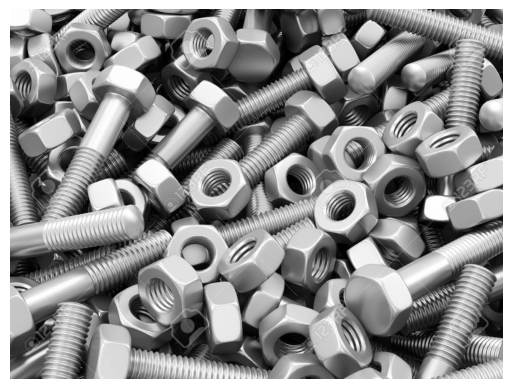

In [2]:
import cv2  
import numpy as np 
from matplotlib import pyplot as plt

# Leer la imagen original (RGB)
# Convertir a escala de grises
img1 = cv2.imread('img1.jpg')
img1_gray = cv2.cvtColor(img1, cv2.IMREAD_GRAYSCALE)

# Mostrar la imagen con matplotlib
plt.imshow(img1_gray, cmap='gray')
plt.axis('off')  # Ocultar los ejes
plt.show()



*TAMAÑO Y TIPO DE IMAGENES*

In [3]:
print("Forma de la imagen original:", img1.shape)
print("Forma de la imagen en escala de grises:", img1_gray.shape)
print("Forma de la imagen binaria:", img1_binary.shape)

Forma de la imagen original: (975, 1300, 3)
Forma de la imagen en escala de grises: (975, 1300, 4)


NameError: name 'img1_binary' is not defined

*CONVERSION DE IMAGEN A DISTINTAS ESCALAS*

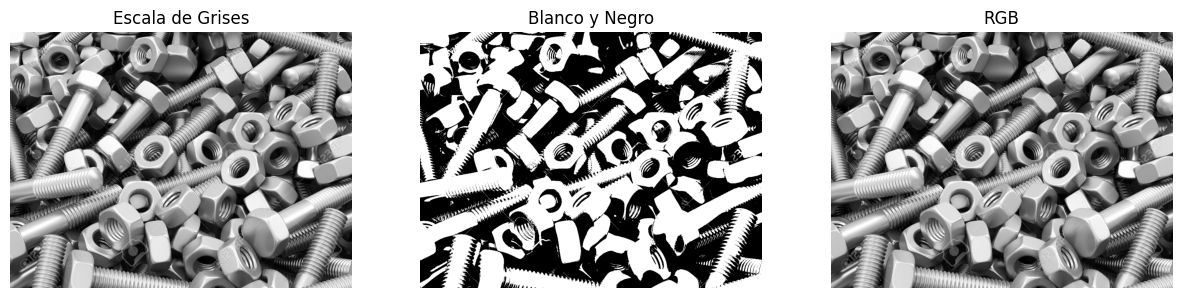

In [4]:
# UMBRAL DEFINIDO A 127 COMO STANDART
_,img1_binary = cv2.threshold(img1_gray,127,255, cv2.THRESH_BINARY)

# Mostrar las imágenes utilizando matplotlib
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Escala de grises
axes[0].imshow(img1_gray, cmap='gray')
axes[0].set_title("Escala de Grises")
axes[0].axis('off')

# Blanco y negro (binaria)
axes[1].imshow(img1_binary, cmap='gray')
axes[1].set_title("Blanco y Negro")
axes[1].axis('off')

# Imagen RGB
axes[2].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
axes[2].set_title("RGB")
axes[2].axis('off')

plt.show()


Conversión a imagen binaria (umbral fijo).



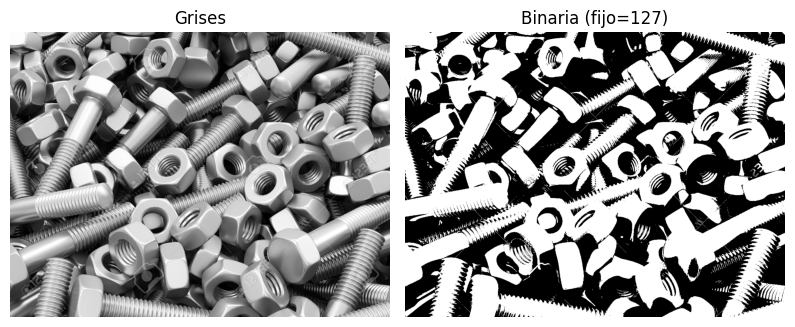

In [5]:
TH = 127 

# Umbral fijo normal (si los tornillos son más claros que el fondo)
_, bin_fijo = cv2.threshold(img1_gray, TH, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(img1_gray, cmap='gray'); plt.title('Grises'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(bin_fijo, cmap='gray'); plt.title(f'Binaria (fijo={TH})'); plt.axis('off')
plt.tight_layout(); plt.show()

Binarización con umbral adaptativo.


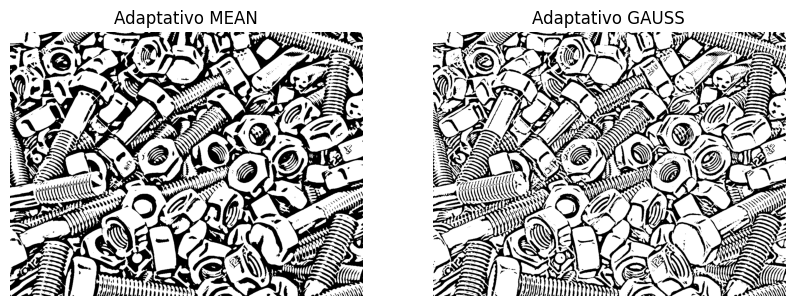

In [6]:
# Convertir correctamente a escala de grises
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

# Aplicar suavizado
gray_blur = cv2.GaussianBlur(img1_gray, (5,5), 0)

# Parámetros de la binarización adaptativa
blockSize = 31  # impar >= 3
C = 5           # constante

# Umbral adaptativo
bin_adapt_mean = cv2.adaptiveThreshold(
    gray_blur, 255,
    cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY, blockSize, C
)

bin_adapt_gauss = cv2.adaptiveThreshold(
    gray_blur, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY, blockSize, C
)

# Mostrar resultados
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(bin_adapt_mean, cmap='gray'); plt.title('Adaptativo MEAN'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(bin_adapt_gauss, cmap='gray'); plt.title('Adaptativo GAUSS'); plt.axis('off')
plt.show()
